In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [221]:
df=pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [222]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [223]:
df.drop('customerID',axis=1,inplace=True)

In [224]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [225]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [226]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
## drop these cols beacuse there is no blank total charges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [227]:
df.iloc[488]['TotalCharges']

' '

In [228]:
df1=df[df.TotalCharges!=' ']
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [229]:
df1.shape

(7032, 20)

In [230]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\hp\AppData\Local\Temp\ipykernel_5340\695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [231]:
df1.TotalCharges.dtypes

dtype('float64')

In [232]:
# plotting tenure with churn no and yes

In [233]:
tenure_chur_no=df1[df1.Churn=='No'].tenure
tenure_chur_yes=df1[df1.Churn=='Yes'].tenure

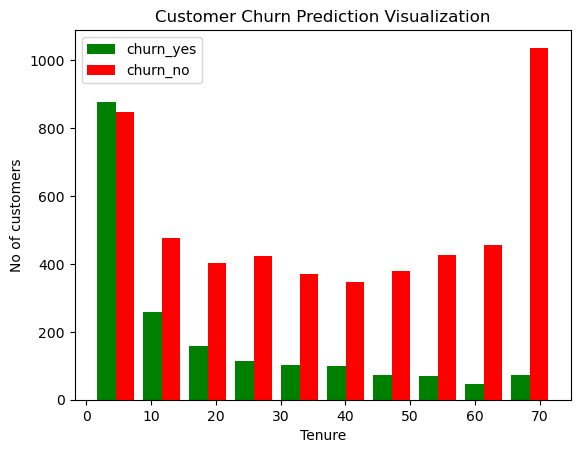

In [234]:
plt.hist([tenure_chur_yes,tenure_chur_no],color=['green','red'],label=['churn_yes','churn_no'])
plt.xlabel('Tenure')
plt.ylabel('No of customers')
plt.title('Customer Churn Prediction Visualization')
plt.legend()

In [235]:
# plot using monthy charges

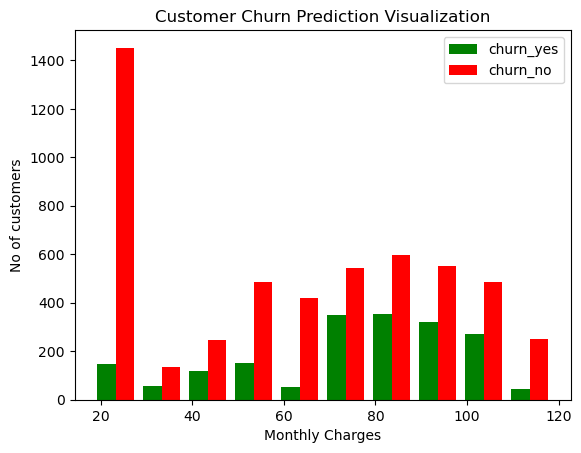

In [236]:
tenure_chur_no=df1[df1.Churn=='No'].MonthlyCharges
tenure_chur_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.hist([tenure_chur_yes,tenure_chur_no],color=['green','red'],label=['churn_yes','churn_no'])
plt.xlabel('Monthly Charges')
plt.ylabel('No of customers')
plt.title('Customer Churn Prediction Visualization')
plt.legend()

In [237]:
## Data Cleaning
def print_unique_col_values(df1):
    for cols in df1:
        if df1[cols].dtypes=='object':
            print(f'{cols} : {df1[cols].unique()}')
    

In [238]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [239]:
df1=df1.replace('No internet service','No')
df1=df1.replace('No phone service','No')

In [240]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [241]:
## replacing yes/no with 1/0 
yes_no_cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
            'StreamingMovies','PaperlessBilling','Churn'  
            ]

for cols in yes_no_cols:
    df1[cols].replace({'Yes':1,'No':0},inplace=True)

In [242]:
for cols in df1:
    print(f'{cols} : {df1[cols].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [243]:
df1.gender.replace({'Female':1,'Male':0},inplace=True)

In [244]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [245]:
## doing one hot encoding for internet service,contract , payment
df1=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

In [246]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [247]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1807,1,0,0,0,1,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
2330,0,0,1,1,28,1,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
5146,0,0,0,1,11,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4164,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,0,1,0,1,0,0
5418,0,1,0,0,18,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0


In [248]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

In [249]:
## using minmax scaler for scaling cols
from sklearn.preprocessing import MinMaxScaler

In [250]:
scaler=MinMaxScaler()
df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])

In [251]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [252]:
X=df1.drop('Churn',axis=1)
y=df1['Churn']


In [253]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [254]:
X_train.shape

(5625, 26)

In [255]:
X_test.shape

(1407, 26)

In [256]:
## model building
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
     keras.layers.Dense(2000,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    
    
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7571 - loss: 0.4996
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7922 - loss: 0.4413
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8029 - loss: 0.4239
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8075 - loss: 0.4038
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8116 - loss: 0.4047
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8079 - loss: 0.4023
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8147 - loss: 0.3973
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8105 - loss: 0.3994
Epoch 9/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8118 - loss: 0.3994
Epoch 10/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8135 - loss: 0.3929


In [257]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7751 - loss: 0.4470 


[0.4509533643722534, 0.7761194109916687]

In [258]:
y_pred=model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [259]:
y_pred[:10]

array([[0.00223711],
       [0.18049578],
       [0.66349   ],
       [0.13486956],
       [0.3093057 ],
       [0.2994144 ],
       [0.108785  ],
       [0.7264681 ],
       [0.193322  ],
       [0.0233881 ]], dtype=float32)

In [260]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64

In [261]:
yp=[]

for i in y_pred:
    if i>0.5:
        yp.append(1)
    else:
        yp.append(0)
yp[:10]

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]

In [262]:
## Classification Report , Heatmap
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.51      0.55       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



Text(50.722222222222214, 0.5, 'Truth')

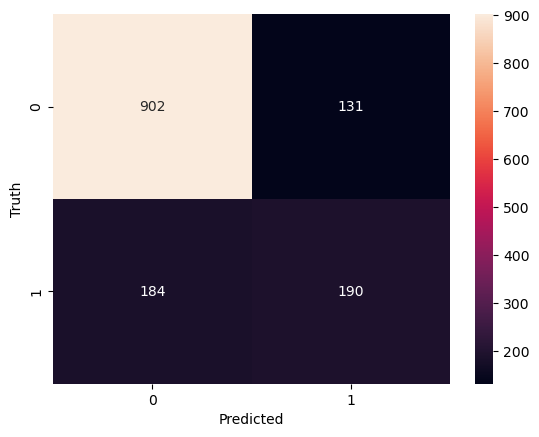

In [263]:
import seaborn as sn
cm=confusion_matrix(y_test,yp)
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Undersampling

In [264]:
df1['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [265]:
# handling imbalance data set
count_class_0,count_class_1=df1.Churn.value_counts()

In [266]:
count_class_0,count_class_1

(5163, 1869)

In [267]:
#divide by class 
df_class_0=df1[df1['Churn']==0]
df_class_1=df1[df1['Churn']==1]

In [268]:
df_class_0.shape

(5163, 27)

In [269]:
df_class_1.shape

(1869, 27)

In [270]:
df_class_0.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3636,1,0,0,1,0.140845,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
6128,1,0,1,0,0.183099,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [271]:
df_class_0_under=df_class_0.sample(count_class_1)
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape

(3738, 27)

In [272]:
print('Random undersampling')
print(df_test_under.Churn.value_counts())

Random undersampling
0    1869
1    1869
Name: Churn, dtype: int64


In [273]:
X=df_test_under.drop('Churn',axis=1)
y=df_test_under['Churn']

In [274]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [275]:
import tensorflow as tf
from tensorflow import keras
def ann_model(X_train,X_test,y_train,y_test):
    model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
     keras.layers.Dense(2000,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    
    
])
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(X_train,y_train,epochs=10)
    print( model.evaluate(X_test,y_test))
    y_pred=model.predict(X_test)
    y_pred=np.round(y_pred)
    print(classification_report(y_test,y_pred))
    return y_pred
    

In [276]:
y_prd=ann_model(X_train,X_test,y_train,y_test)

Epoch 1/10


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6696 - loss: 0.5876
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7476 - loss: 0.5070
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7731 - loss: 0.4821
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7563 - loss: 0.4983
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7832 - loss: 0.4604
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7718 - loss: 0.4711
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7715 - loss: 0.4657
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7782 - loss: 0.4583
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7908 - loss: 0.4504
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7796 - loss: 0.4507
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7512 - loss: 0.5148  
[0.5106087923049927, 0.7473261952400208]
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              p

In [277]:
y_prd[:5]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [278]:
y_test[:5]

3262    1
5229    1
691     0
6117    0
3002    0
Name: Churn, dtype: int64

# Oversampling

In [279]:
count_class_0,count_class_1

(5163, 1869)

In [280]:
df_class_one_over=df_class_1.sample(count_class_0,replace=True)


In [281]:
df_test_over=pd.concat([df_class_0,df_class_one_over],axis=0)

In [282]:
df_test_over.Churn.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [283]:
X=df_test_over.drop('Churn',axis=1)
y=df_test_over['Churn']

In [284]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [285]:
y_pred=ann_model(X_train,X_test,y_train,y_test)

Epoch 1/10


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7307 - loss: 0.5368
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7614 - loss: 0.4940
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7663 - loss: 0.4797
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7721 - loss: 0.4724
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7773 - loss: 0.4589
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7774 - loss: 0.4667
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7804 - loss: 0.4532
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8028 - loss: 0.4355
Epoch 9/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7990 - loss: 0.4307
Epoch 10/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7980 - loss: 0.4261
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7660 - loss: 0.4873
[0.47587087750434875, 0.7700871229171753]
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

# Smote

In [286]:
X=df1.drop('Churn',axis=1)
y=df1['Churn']

In [287]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [288]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [289]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)

In [290]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [291]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=42,stratify=y_sm)

In [292]:
y_pred=ann_model(X_train,X_test,y_train,y_test)

Epoch 1/10


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7296 - loss: 0.5300
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7874 - loss: 0.4463
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7951 - loss: 0.4486
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7925 - loss: 0.4378
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8027 - loss: 0.4244
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8009 - loss: 0.4258
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8026 - loss: 0.4190
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8197 - loss: 0.3973
Epoch 9/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8107 - loss: 0.4090
Epoch 10/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8140 - loss: 0.3993
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: 0.4547
[0.4607662260532379, 0.7952565550804138]
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

In [293]:
y_pred[10:15]

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [294]:
y_test[10:15]

7756    1
123     0
2102    0
2036    0
8603    1
Name: Churn, dtype: int64

# Ensemble learning using undersampling

In [295]:
df1.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [296]:
X=df1.drop('Churn',axis=1)
y=df1['Churn']

In [297]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [298]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [299]:
4130/1495

2.762541806020067

In [300]:
df3=X_train.copy()
df3['Churn']=y_train

In [301]:
df3_class_0=df3[df3.Churn==0]
df3_class_1=df3[df3.Churn==1]

In [302]:
df3_class_0.shape,df3_class_1.shape

((4130, 27), (1495, 27))

In [303]:
def get_train_batch(df_major,df_minor,start,end):
    df_train=pd.concat([df_major[start:end],df_minor],axis=0)
    X_train=df_train.drop('Churn',axis=1)
    y_train=df_train['Churn']
    
    return X_train,y_train
    

In [304]:
X_train,y_train=get_train_batch(df3_class_0,df3_class_1,0,1495)

In [305]:
X_train.shape

(2990, 26)

In [306]:
y_pred1=ann_model(X_train,X_test,y_train,y_test)

Epoch 1/10


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7066 - loss: 0.5788
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7523 - loss: 0.5031
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7674 - loss: 0.4756
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7671 - loss: 0.4709
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7792 - loss: 0.4589
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7645 - loss: 0.4653
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7843 - loss: 0.4541
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7754 - loss: 0.4467
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7794 - loss: 0.4568
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7919 - loss: 0.4441
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6845 - loss: 0.5851 
[0.6050769686698914, 0.676616907119751]
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              pre

In [307]:
X_train,y_train=get_train_batch(df3_class_0,df3_class_1,1495,2990)
y_pred2=ann_model(X_train,X_test,y_train,y_test)

Epoch 1/10


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6821 - loss: 0.5911
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7615 - loss: 0.4992
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7719 - loss: 0.4828
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7626 - loss: 0.4887
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7696 - loss: 0.4607
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7724 - loss: 0.4707
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7878 - loss: 0.4457
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7762 - loss: 0.4650
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7914 - loss: 0.4413
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7904 - loss: 0.4459
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7606 - loss: 0.4690 
[0.4790569543838501, 0.7576403617858887]
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              pr

In [308]:
X_train,y_train=get_train_batch(df3_class_0,df3_class_1,2990,4485)
y_pred3=ann_model(X_train,X_test,y_train,y_test)

Epoch 1/10


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7075 - loss: 0.5771
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7541 - loss: 0.5053
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7842 - loss: 0.4704
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7810 - loss: 0.4702
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7771 - loss: 0.4824
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7724 - loss: 0.4775
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7917 - loss: 0.4499
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7826 - loss: 0.4662
Epoch 9/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7807 - loss: 0.4666
Epoch 10/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7960 - loss: 0.4454
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7123 - loss: 0.5392 
[0.5498398542404175, 0.7050461769104004]
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              pr

In [309]:
y_pred_final=y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0
        

In [310]:
y_pred_final[:5]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [311]:
y_test[:5]

974     0
619     0
4289    0
3721    1
4533    0
Name: Churn, dtype: int64

In [312]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1033
           1       0.48      0.81      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.75      0.69      1407
weighted avg       0.79      0.71      0.73      1407



In [313]:
# Conclusion : Smote works better among all